In [1]:
import requests, time, re, jieba
import jieba.analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import *
from PIL import Image
from bs4 import BeautifulSoup
from matplotlib import colors
from collections import Counter # 次數統計
from ckiptagger import WS
from snownlp import SnowNLP
# conda install -c conda-forge wordcloud=1.6.0 
from wordcloud import WordCloud, ImageColorGenerator

<html>
    <h1>爬蟲</h1>
</html>

In [2]:
title = []
urls = []

u = "https://news.ltn.com.tw/list/breakingnews/popular"

res = requests.get(u)
soup = BeautifulSoup(res.content, "lxml")
soup = soup.find_all("li", attrs={"data-page": "1"})

for i in range(len(soup)) :
    url = soup[i].select("a")[0]["href"]
    urls.append(url)
    t = soup[i].find("h3").text
    title.append(t)

allcontent = []
index = []
num = 0
for u in urls:
    content = []
    res = requests.get(u)
    soup = BeautifulSoup(res.content, "lxml")

    try:
        if u[7:12] == '/news' :
            soup = soup.find("div", class_="text boxTitle boxText")
        elif u[7:13] == '/sport' :
            soup = soup.find_all("div", class_="text")[1]
        else :
            soup = soup.find("div", class_="text")
        
        for a in soup.find_all("p"):
            p = a.text
            check = 0
            for f in range(0, len(p)-1) :
                if p == '請繼續往下閱讀...' or p == '\n    不用抽 不用搶 現在用APP看新聞 保證天天中獎　\n    點我下載APP　\n    按我看活動辦法\n'                or p[f:f+5] == '首次上稿' or p[f:f+6] == '（資料照）' or p[f:f+2] == '攝）':
                    check = 1
            if check != 1 :
                content.append(p)
        content_str = ''
        for n in range(1, len(content)) :
            if content[n] != '' :
                content_str = content_str + ' ' + content[n]
        allcontent.append(content_str)
    except:
        index.append(num)
        pass
    num += 1
    
if len(urls) == len(title) == len(allcontent) :
    print('OK')
else :
    # 把有些爬不了的網站移除
    index.reverse()
    for i in range(len(index)) :
        urls.pop(index[i])
        title.pop(index[i])

OK


In [3]:
# 網址 + 標題 + 內文
for i in range(len(allcontent)) :
    print(urls[i] + '\n' + title[i] + '\n' + allcontent[i])
    print('--------------------------------------------------------------------------------------------------------------')

https://news.ltn.com.tw/news/politics/breakingnews/3957921
國民黨同舟計畫翻船！林婕麗「退黨」：朱立倫撕裂、市黨部打壓
 〔記者鄭名翔／台北報導〕透過「同舟計畫」重返國民黨、原意參選台北市中山、大同區議員的林婕麗，先是因資格不符無法參加初選，再度無緣挑戰議員，令她不滿表示，國民黨上至主席朱立倫大玩兩手策略、扼殺羅智強，自己也遭國民黨台北市黨部打壓，加上朱立倫過度親美、路線搖擺不定，撕裂藍軍團結，因此今宣布退黨，未來以自己的方式幫助藍營。 2018年因堅持參選市議員而遭國民黨停權的林婕麗，去年透過朱立倫推動的「同舟計畫」重返國民黨，並意在爭取提名參選中山、大同區市議員，但國民黨台北市黨部以回黨不到6個月未准。 林婕麗今表示，過去朱立倫承諾桃園的黨內同志，不會空降人選選桃園市長，藉此「卡」辭掉北市議員的羅智強，但最後竟以徵召方式派前行政院長張善政空降，此舉出爾反爾、不講信用、大玩兩面手法，不給有心參選的同志公平初選機會，不僅令羅智強心灰意冷、桃園同志不服氣，也讓張善政未來將舉步維艱，奪回市長寶座機率渺茫。 林婕麗稱最能體會羅智強處境，因自己也長期受到國民黨台北市黨部主委黃呂錦茹的打壓，形容朱立倫之於羅智強，如同黃呂錦茹之於林婕麗，原只求公平初選機會，但黨不給機會，令人心寒，證實外界批評國民黨「內鬥內行，外鬥外行」的評價。 林婕麗表示，因不斷受到市黨部打壓，加上朱立倫過度親美、路線搖擺不定，撕裂藍軍團結，經深思熟慮後忍痛退黨，未來將持續耕耘地方、以自己的方式幫助藍營。 林婕麗也感嘆，黨中央跟市黨部把心力花在鬥倒同志，卻沒想過勝選的最大可能，令有心扶持國民黨的同志們情何以堪，因感受不到國民黨有贏過敵對政黨的企圖心，「我本將心向明月，奈何明月照溝渠」，稱退黨之舉實屬無奈。
--------------------------------------------------------------------------------------------------------------
https://news.ltn.com.tw/news/life/breakingnews/3953645
7縣市遠距教學延長1週  下週停課資訊一次看（不斷更新）
 〔即時新聞／綜合報導〕全台武漢肺炎（新型冠狀病毒病，COVID

<html>
    <h1>標題前十大字彙(檢視出現最多的十個「字」是哪些)</h1>
</html>

In [4]:
# 去除標點符號+數字+英文字母的標題&文章
titles = str(title)
titles1 = ''.join(char for char in titles if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles3 = re.sub('[a-zA-Z]','',titles2)

# 每個字出現次數
wordt = {}
for w in titles3:
    if w not in wordt:
        wordt[w] = 1
    else :    
        wordt[w] = wordt[w] + 1

In [12]:
sortwordt = sorted(wordt.items(), key = lambda x : x[1], reverse = True)[:10]
str_w = sortwordt[0][0]
for i in range(1, len(sortwordt)) :
    str_w = str_w + sortwordt[i][0]
print('自由時報標題前十大字彙為：' + str_w)

自由時報標題前十大字彙為：黨市不人新黃文戲天民


# 文字雲

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\acer\AppData\Local\Temp\jieba.cache
Loading model cost 0.744 seconds.
Prefix dict has been built successfully.


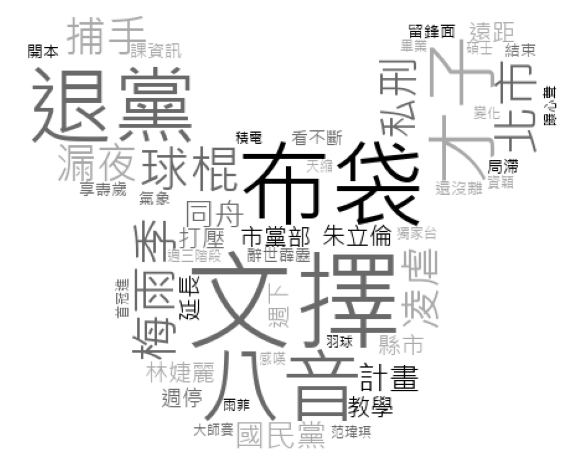

In [6]:
# 去除標點符號+數字+英文字母的標題&文章
titles1 = ''.join(char for char in str(title) if char.isalnum())
titles2 = ''.join([i for i in titles1 if not i.isdigit()])
titles = re.sub('[a-zA-Z]','',titles2)

tags = jieba.analyse.extract_tags(titles, topK=50, withWeight=True)
dictionary = {}
for i in range(len(tags)) :
    dictionary[tags[i][0]] = tags[i][1]

# 設定文字雲細項
color_list=['#000000','#A9A9A9','#696969']# 建立顏色數組，更改字體顏色
colormap=colors.ListedColormap(color_list)
fontpath = "C:/test-wordcloud/msjh.ttc"  # 字型檔
mask = np.array(Image.open("C:/mickey.png")) # 文字雲樣式
wordcloud = WordCloud(background_color="white", colormap=colormap, mask=mask, font_path=fontpath)
wc = wordcloud.generate_from_frequencies(dictionary)

plt.figure(figsize=(10,10))
plt.imshow(wc), plt.axis("off")
plt.show()

# 會存在下載中，注意檔名重複問題
wc.to_file('ltn_wordcloud.jpg')

　　由於標題以較少字數概要的說明新聞內容，更需精簡選擇用字，因此比較不會出現代名詞、 虛字等功能性用字。另一個比較有趣的現象是各家單字前十名，皆包含「死」或「曝」。雖然現今新聞寫稿越來越嚴謹，但許多新聞為了吸引民眾的點閱來提高流量，使用較為誇張、聳動的字或詞。在這些用字和用詞下，乍看下讓你很想點進去看的標題，點進去後卻發現文不對題。時間一久，讀者會對該媒體產生不信任感。<br>

　　因此，我們使用文字探勘技術，以精確度來了解台灣網路媒體前三名新聞網標題用字和用詞與內文是否相符，另外，也透過情緒分析新聞網的立場是否中立，並依照分析出的結果來提供民眾選擇傾向的新聞風格。

#  平均精確度  --- 餘弦相似、相符合程度

In [7]:
# 剔除標點符號、數字及英文
stop_word01 = ['「', '」',' ' , '（' , '）' , '／'  , '：'  , '-' ,'，','。','\n','\r','！','\u3000', '？', '《', '》', '.']
def clearData(news , stop_words):
    result = ''
    re1 = re.sub('[a-zA-Z]','',news)
    for w in re1 :
        if w not in stop_words : 
            result = result + w 
    return result

# 內文
token_c=[]
for i in allcontent:
    token_c.append(clearData(i,stop_word01))

# 標題
token_t=[]
for i in title:
    token_t.append(clearData(i,stop_word01))

## CKIP斷詞

In [8]:
ws_title=[]
ws_content=[]
for i in range(len(token_t)) :
    title_text = token_t[i]
    content_text = token_c[i]
    
    ws = WS("C:\\Users\\acer\\Downloads\\data")
    
    ws_title.append(ws([title_text]))
    ws_content.append(ws([content_text]))

C:\Anaconda3\envs\Py38\lib\site-packages\ckiptagger\model_ws.py:106: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  cell = tf.compat.v1.nn.rnn_cell.LSTMCell(hidden_d, name=name)
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
C:\Anaconda3\envs\Py38\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.add_variable(


### Cosine Similarity(餘弦相似)，需要計算 A、B 兩向量的 dot 值、以及 A、B 兩向量的長度
#### - 夾角越大，代表兩個向量越是不像；
#### - 夾角越小，代表兩個向量越是相像
### Cosine Similarity值越大,標題與內文越相似

In [9]:
veclist_title=[]      # 標題內文向量存取陣列
veclist_content=[]

for a in range(len(ws_title)):
    countword={}      #統計標題斷詞在內文斷詞中出現次數
    for i in ws_title[a][0]:
        countword[i]=0
        for j in ws_content[a][0]:
            if i.__eq__(j):
                if i not in countword:
                        countword[i] = 1
                else:
                        countword[i] +=1
        
    vector_content=[]
    vector_title=[]
    for k,v in countword.items():
        vector_content.append(countword.get(k))     # content 次數向量
        vector_title.append(1)                      # title   次數向量 (因以標題為主要判斷出現次數之文字依據,故向量值皆為1
        
    veclist_content.append(vector_content)  # 加入標題內文向量存取陣列
    veclist_title.append(vector_title)    

In [13]:
CS = 0
Co0 = 0
for i in range(len(veclist_title)):
    # Dot and norm
    dot = sum(a*b for a, b in zip(veclist_content[i], veclist_title[i]))
    norm_a = sum(a*a for a in veclist_content[i]) ** 0.5
    norm_b = sum(b*b for b in veclist_title[i]) ** 0.5
    
    # Cosine similarity
    if norm_a == 0 or norm_b == 0 :
        cos_sim = 0
        Co0 += 1
    else :
        cos_sim = dot / (norm_a*norm_b)
    CS += cos_sim
    
avg_CS = CS / (len(veclist_title)-Co0)
print('自由時報餘弦相符合程度:', '%.2f%%' % (avg_CS * 100))

自由時報餘弦相符合程度: 68.30%


<html>
    <h1>情緒分析</h1>
</html>

In [11]:
text = str(allcontent)
stopword = ['，', '。', '、', '「', '」', '！', '；', '：']

index = [0] 
for i in range(len(text)) :
    if text[i] in stopword :
        index.append(i)
lines = []     
for i in range(len(index)-1) :
    start = index[i] + 1
    end = index[i+1]
    if len(text[start:end]) > 1 :
        lines.append(text[start:end])

values = []
for line in lines :
    values.append(SnowNLP(line).sentiments)
    
posi = 0
nega = 0
for i in values:
    if (i >= 0.5):
        posi += 1
    else:
        nega += 1

rate = posi / (posi+nega)
print('此新聞網正面用句的比例 : ','%.2f%%' % (rate * 100)) #格式化為百分比

此新聞網正面用句的比例 :  41.11%


# 將資料放進Excel

In [15]:
wb = load_workbook(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
ws = wb.active

num = int(input('這是第幾筆資料，例：1：'))

data1 = '%.2f%%' % (avg_CS * 100)
data2 = '%.2f%%' % (rate * 100)
data3 = str_w

ws.cell(num+2, 5, data1)
ws.cell(num+2, 6, data2)
ws.cell(num+2, 7, data3)

wb.save(r'C:\\Users\\acer\\OneDrive\\桌面\\daily information.xlsx')
print('done')

這是第幾筆資料，例：1：10
done


# 參考文獻

#### - https://blog.csdn.net/wangzirui32/article/details/118056830 
#### - https://clay-atlas.com/blog/2020/03/26/cosine-similarity-text-count/
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - https://blog.csdn.net/miaoxiaowuseng/article/details/107343427
#### - https://www.796t.com/content/1545012004.html
#### - https://pixnashpython.pixnet.net/blog/post/28128736-%E6%96%87%E5%AD%97%E9%9B%B2
#### - https://clay-atlas.com/blog/2019/09/24/python-chinese-tutorial-ckiptagger/
#### - http://csyue.nccu.edu.tw/ch/Taiwan%20Newspapers%20(2020).pdf
#### - https://blog.hashteacher.com/?p=1378
#### - https://www.webucator.com/article/python-color-constants-module/